In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/old_faithful.csv')

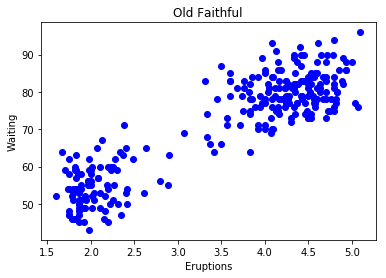

In [3]:
plt.plot(data.iloc[:, 0], data.iloc[:, 1], 'bo')

plt.title('Old Faithful')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')

plt.show()

## K-Means Clustering

In [4]:
class KMeansClustering:
    def __init__(self):
        pass
    
    def fit(self, k, data, iter_time):
        data['cluster'] = 0
        self.centroids = self.init_centroids(k, data)
        
        for i in range(iter_time):
            distances = self.compute_distance(self.centroids, data)
            data['cluster'] = self.assign_cluster(distances)
            
#             if (i + 1) % 100 == 0 or i == 0:
#                 print('Iteration ' + str(i + 1) + ' cost: ' + str(self.compute_cost(distances)))

            self.centroids = self.relocate_centroids(k, self.centroids, data)
        
        return data
    
    def init_centroids(self, k, data):
        return data.sample(k)
    
    def compute_distance(self, centroids, data):
        features = centroids.columns.drop('cluster').values
        distances = {}
        
        for index in range(len(centroids)):
            centroid = centroids.iloc[index]
            key = 'centroid' + str(index + 1)
            distances[key] = (centroid - data.iloc[:]).pow(2).sum(axis=1).pow(0.5)
            
        return distances
    
    def assign_cluster(self, distances):
        return [np.int(key[-1]) for key in pd.DataFrame(distances).idxmin(axis=1).values]
    
    def compute_cost(self, distances):
        return pd.DataFrame(distances).min(axis=1).sum() / len(list(distances.keys())[0])
    
    def relocate_centroids(self, k, centroids, data):
        for i in range(k):
            clustered_data = data.loc[lambda x: x['cluster'] == i]
            centroids[i] = clustered_data.mean(axis=1)
        
        return centroids

In [12]:
k = 2
model = KMeansClustering()
clustered_data = model.fit(k, data, 100)

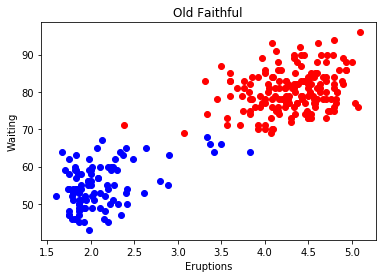

In [13]:
colors = ['red', 'blue']

for i in range(1, k + 1):
    clustered_elements = clustered_data.loc[lambda x: x['cluster'] == i]
    plt.plot(clustered_elements.iloc[:, 0], clustered_elements.iloc[:, 1], 'bo', color=colors[i - 1])
    
plt.title('Old Faithful')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')

plt.show()

In [7]:
print(model.centroids)

    eruptions  waiting  cluster   0          1
61      4.500       84        0 NaN  29.833333
96      4.667       84        0 NaN        NaN
